In [ ]:
# Install the library
!pip -q install FireHR==0.1.2 pyhdf==0.10.2
!pip install geopandas
!pip install rioxarray
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.3/193.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.2/191.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.2/191.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.2/191.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.1/191.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.1/191.1 kB 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
#from FireHR.data import *
import pandas as pd
from datetime import datetime, timezone
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from PIL import Image
import PIL

In [ ]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

let us assume that the name of the image is 1_20_1234
* 1 is the changes made in the image box
* It can take values of 1 and 2
  * 2 is for 0.05
  * 1 is for 0.1

* 20 is the scaling factor
* It can take values of 20, 30, 40, and 50

* The last number is the row in the dataframe
* hence put the value of i as 1 minus that number

"drive/MyDrive/forest_fire_dataset/bands/box_size_0.05/scale_meters_20/"

* Here change the value of box_size_ as 0.05 for 1 and box_size_ as 0.1 for 2

* scale_meters_ will also change with change in 20, 30, 40, and 50

* Similarly do the changes in the image path,
drive/MyDrive/forest_fire_dataset/segmentation_images/2_20_

ValueError: ignored

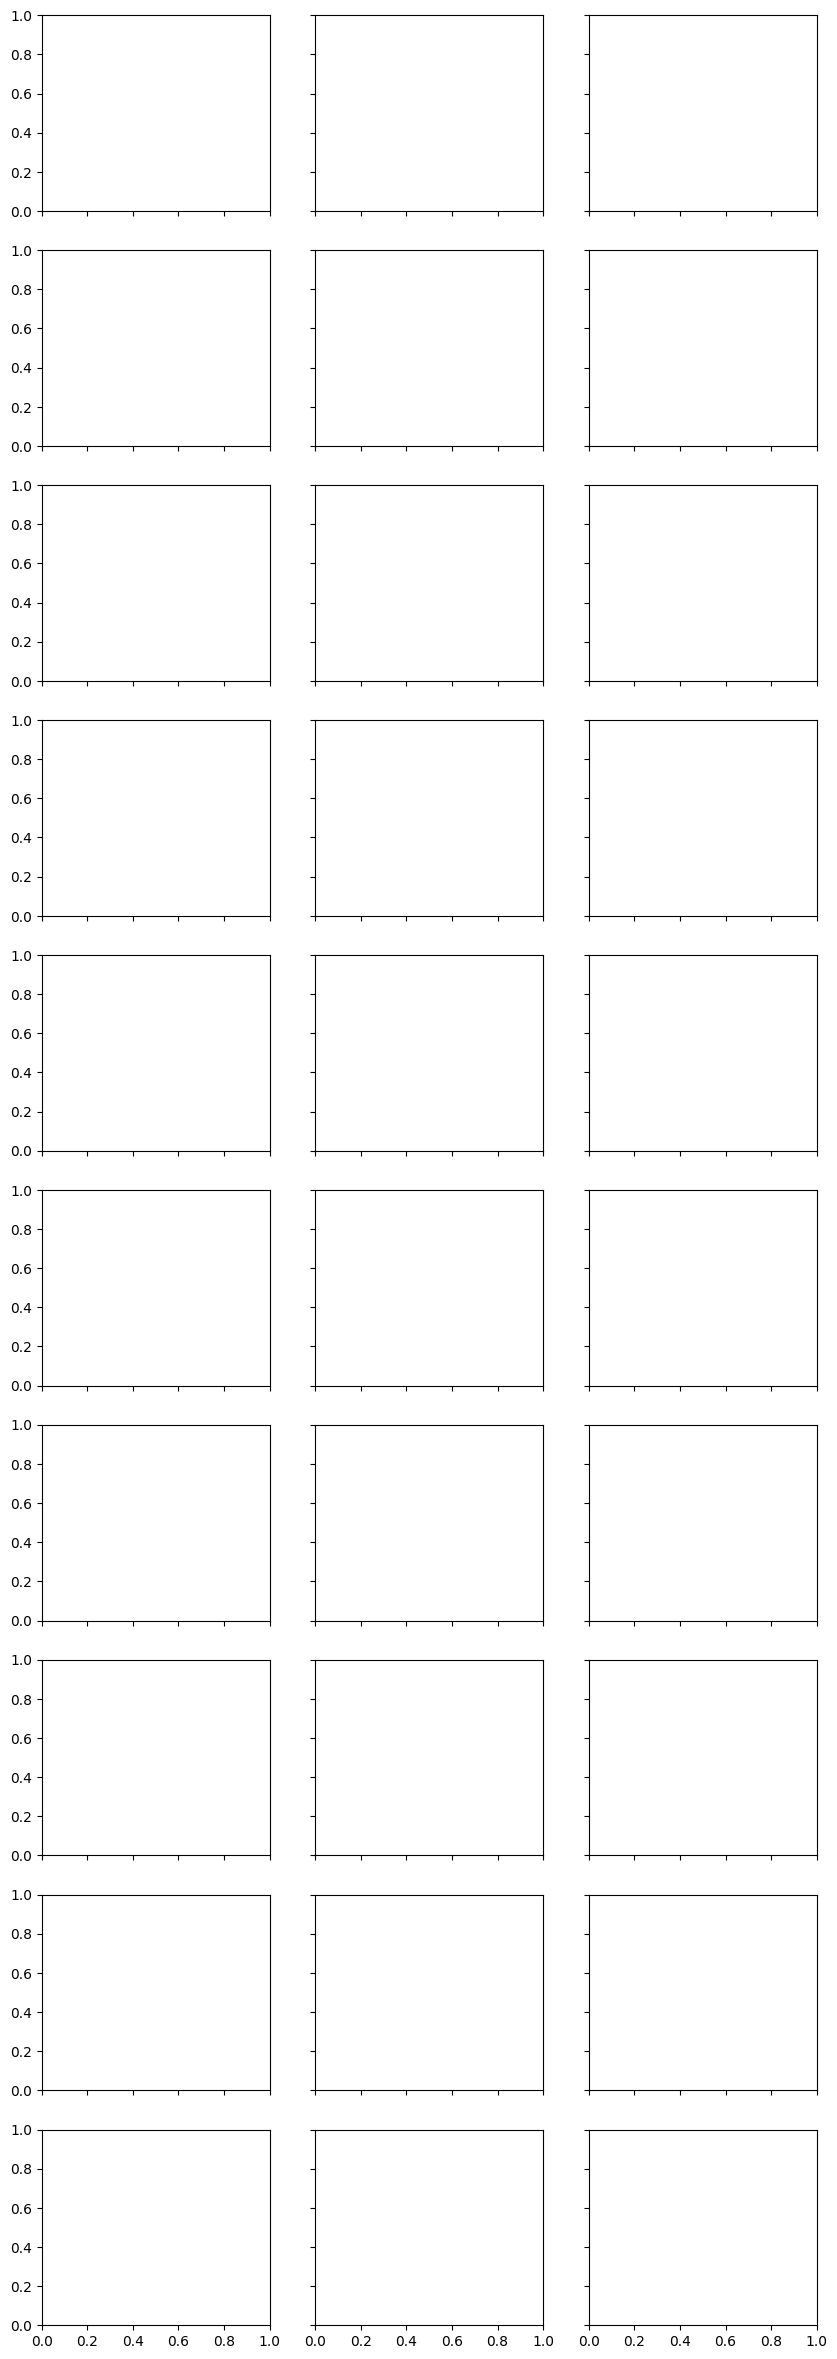

In [ ]:
i = 7
post_fire_paths = []
d = 'drive/MyDrive/6/'    # 0.05,30
for filename in os.listdir(d):
    post_fire_paths.append(os.path.join(d,filename))
post_fire_paths.sort()
all_bands = []
for j, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[j]["band"]=j+1
landsat_post_fire_xr = xr.concat(all_bands, dim="band")
landsat_post_fire_xr.plot.imshow(col="band",
                                 col_wrap=3,
                                 cmap="rgb")
plt.show()

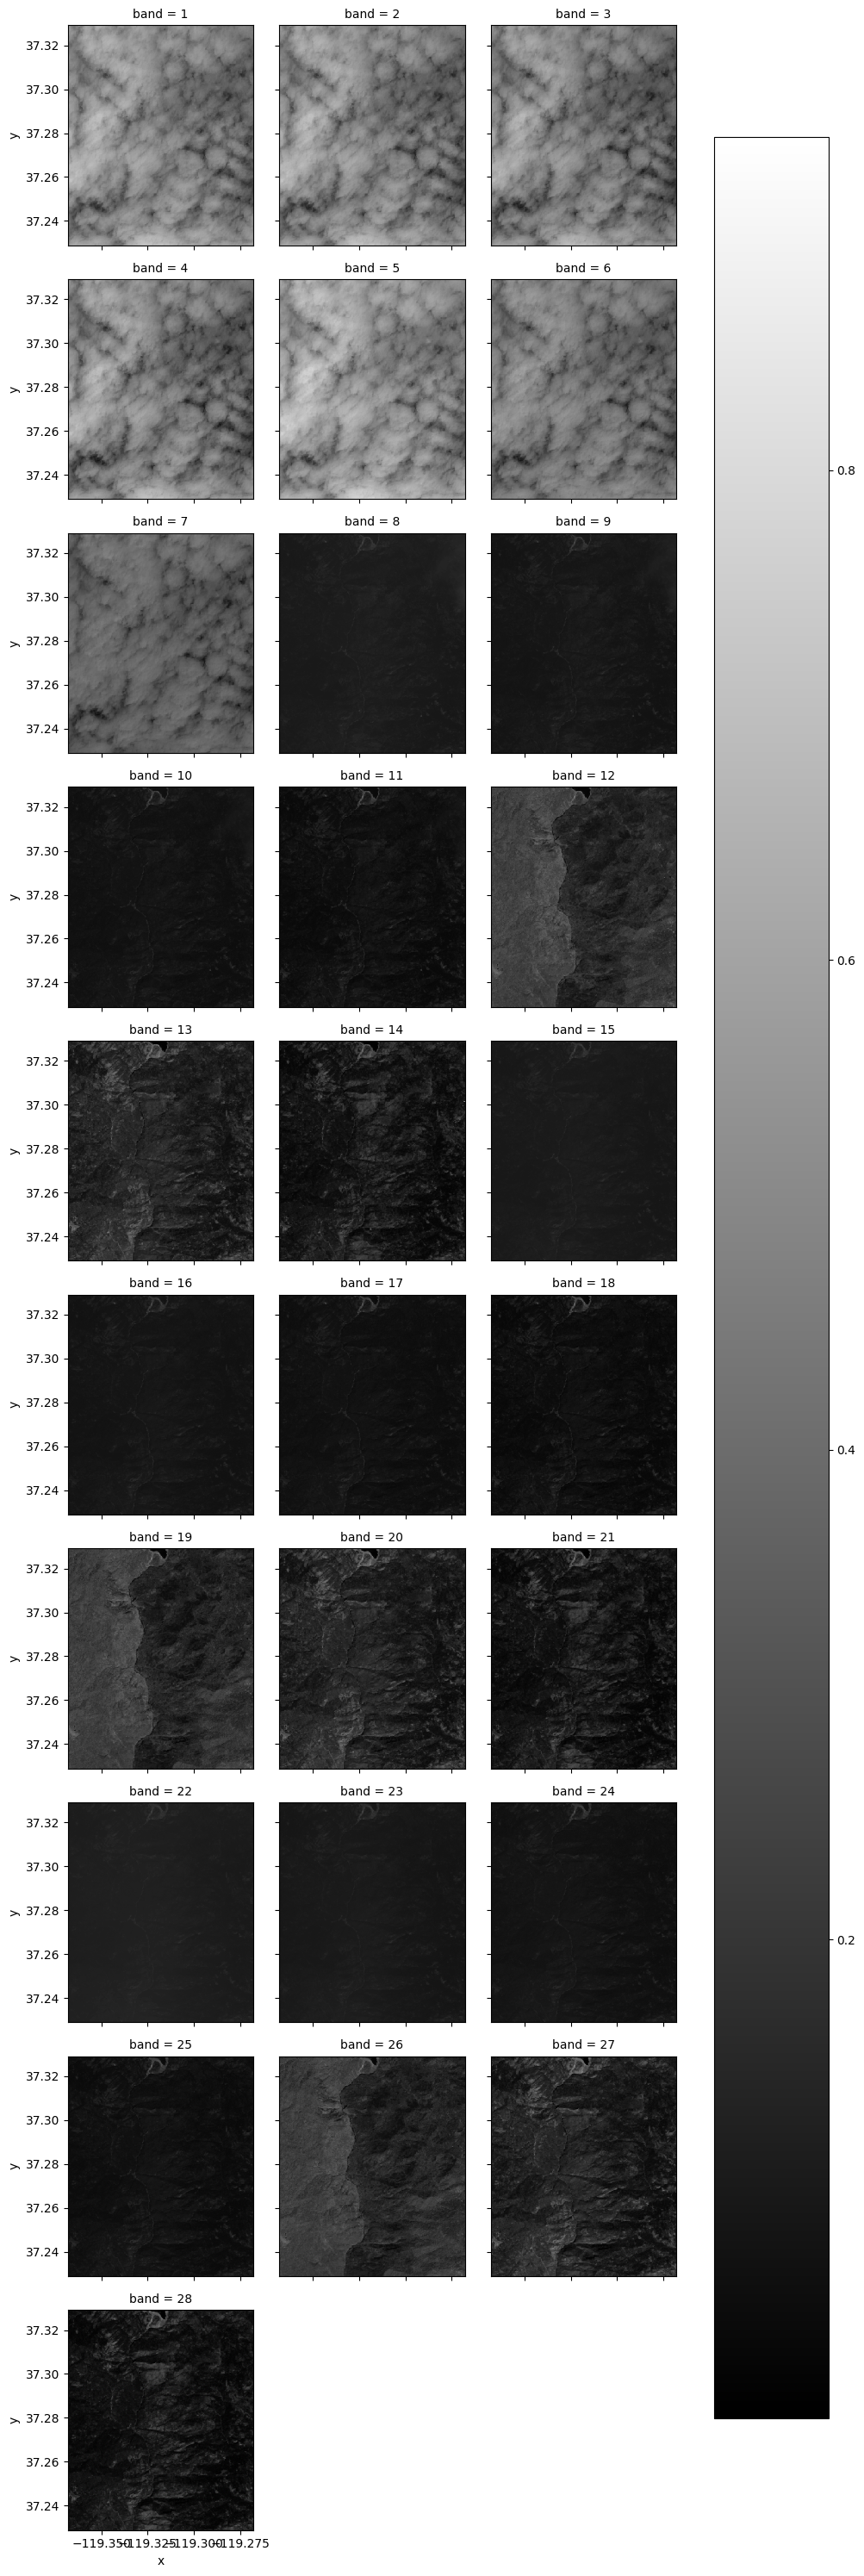

In [ ]:
landsat_post_fire_xr.plot.imshow(col="band",
                                 col_wrap=3,
                                 cmap="gray")
plt.show()

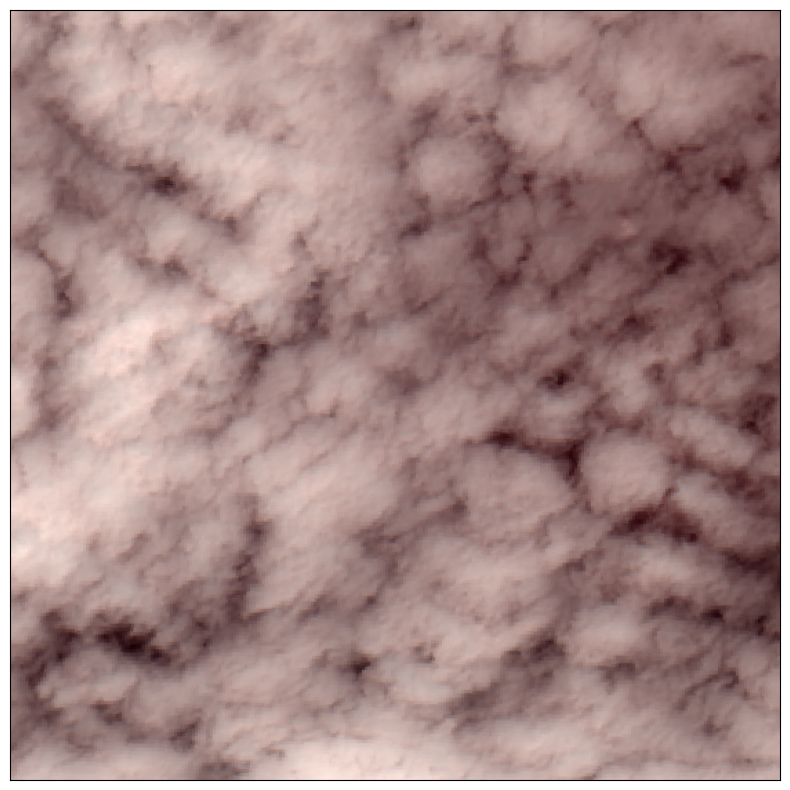

In [ ]:
x = 4
a = ep.plot_rgb(landsat_post_fire_xr.values,
          rgb=[x, x-1, x-2],
          figsize=(10, 10))

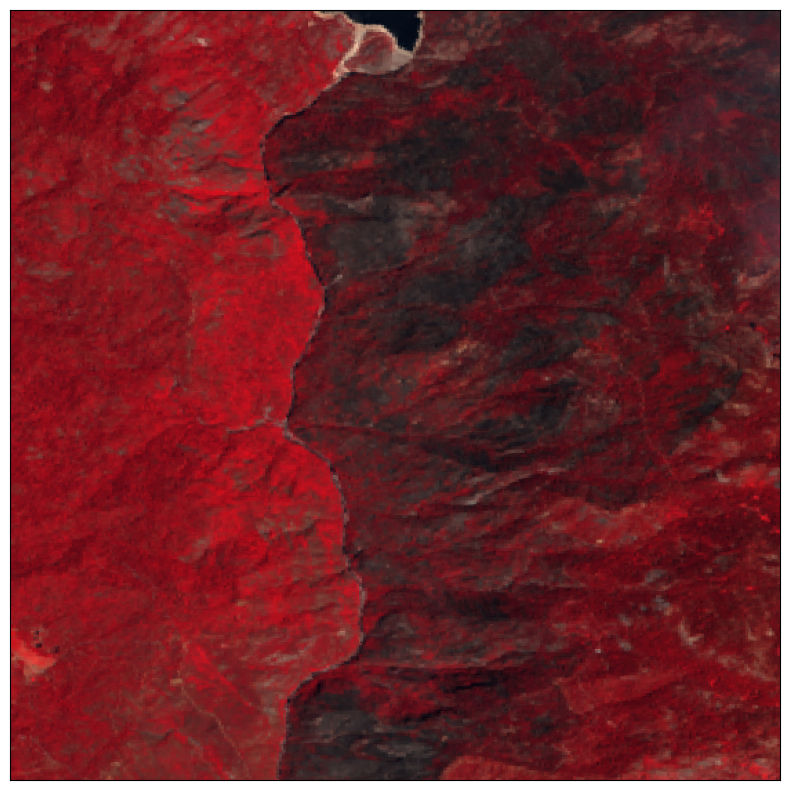

In [ ]:
x = 11
a = ep.plot_rgb(landsat_post_fire_xr.values,
          rgb=[x, x-1, x-2],
          figsize=(10, 10))

In [ ]:
i = 7
post_fire_paths = []
d = 'drive/MyDrive/forest_fire_dataset/bands/box_size_0.05/scale_meters_20/'+str(i+1)+'/'    # 0.05,30
for filename in os.listdir(d):
    post_fire_paths.append(os.path.join(d,filename))
post_fire_paths.sort()
all_bands = []
for j, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[j]["band"]=j+1
landsat_post_fire_xr = xr.concat(all_bands, dim="band")
landsat_post_fire_xr.plot.imshow(col="band",
                                 col_wrap=3,
                                 cmap="gray")
plt.show()

In [ ]:
a.figure.savefig('drive/MyDrive/forest_fire_dataset/segmentation_images/1_50_'+str(i+1)+'.png')